## Load the packages

In [2]:
from method.packaged_methods import iTransNA_embedding
import torch
import numpy as np 
import h5py as h5
import matplotlib.pyplot as plt
from method.utils import plot3dproj, hankel_matrix, standardize_ts, filter_components, mutual_information

## Load the experimental data

In [2]:
id = 1
file_path = "./data/3D-lorenz/lorenz_no"+str(id)+".h5"
fr = h5.File(file_path, mode="r")
data = fr["xM"][()].transpose()
fr.close()

In [3]:
data.shape

(10000, 3)

## Load the parameters

In [30]:
# network parameters
class net_configs:  # univariate
    def __init__(self) -> None:
        self.seq_len = 20             # W, also equal to 'time_window' below
        self.pred_len = 10            # L_{pred}
        self.d_model = 32             # the encoder dimension
        self.n_heads = 4              # attention head number
        self.dropout = 0.0            # set 0, dropout is not applied for all experiments
        self.d_ff = None              # default value, don't alter
        self.activation="relu"        # default activation function, don't alter
        self.e_layers = 2             # encoder layer number
        self.target_dim = 1           # the channel number of measurements, equal to 'n_variables' below

# embedding scheme parameters
class emb_configs:  # univariate
    def __init__(self) -> None:
        self.n_l = 10  
        self.L_inc = 0
        self.K = 10
        self.ε = 0.05
        self.α1 = 1e-3
        self.α2 = 1e-4
        self.μ = 0.999

# model training parameters
class learn_configs: # univariate
    def __init__(self) -> None:
        self.lr = 0.01
        self.batch_size = 512
        self.n_epochs = 200
        self.random_seed = 2024
        self.device = torch.device('cuda:0')
        self.verbose = False

In [31]:
net_conf = net_configs()
emb_conf = emb_configs()
lea_conf = learn_configs()

# Execute the embedding

In [32]:
Recon, model = iTransNA_embedding(
    input          = data[:,[0]],
    net_configs    = net_conf,
    emb_configs    = emb_conf,
    lea_configs    = lea_conf
    )
# Recon: the reconstruction results
# model: the embedding model

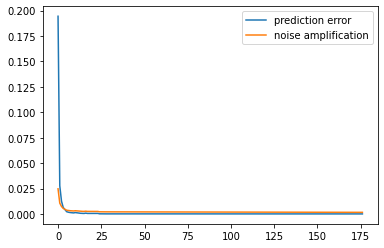

In [34]:
loss = np.array(model.loss_list)
plt.plot(loss[:,0], label='prediction error')
plt.plot(loss[:,1], label='noise amplification')
plt.legend()
plt.show()

<Axes3DSubplot:>

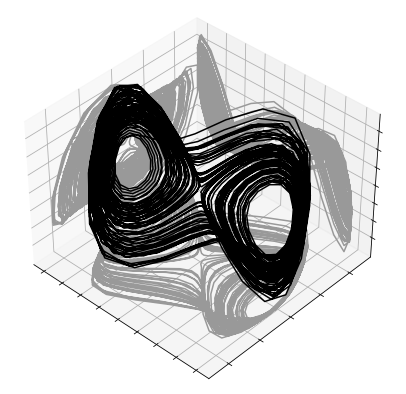

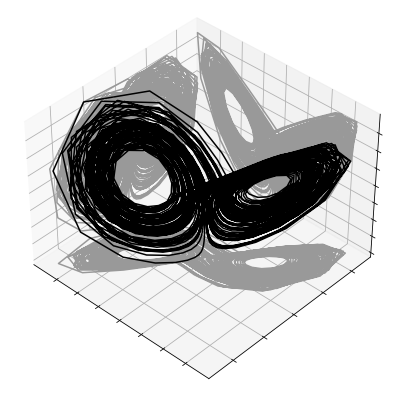

In [35]:
L=2000
plot3dproj(Recon[:L,0],Recon[:L,1],Recon[:L,2])

plot3dproj(data[:L,0],data[:L,1],data[:L,2])